In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import glob

In [2]:
plt.rcParams['figure.figsize'] = (12, 4)

### Herbivores and carnivores in a single lowland cell

- 50 herbivores with age 5 and weight 20 placed in single lowland cell
- Simulated 50 years
- 20 carnivores with age 5 and weight 20 added
- Simulated 250 years
- Default parameters for animals and lowland
- Simulations performed with five different seeds
- For each simulation, herbivore and carnivore count for each year is written to csv file

In [3]:
mhcd = [np.loadtxt(fname, delimiter=',') for fname in glob.glob('data_ref/mono_hoh_??.csv')]
tc = mhcd[0][:, 0]   # time axis

# herbivore and carnivore counts
hc = np.zeros((len(tc), len(mhcd)))  
cc = np.zeros((len(tc), len(mhcd)))  
for k, cts in enumerate(mhcd):
    hc[:, k] = cts[:, 1]
    cc[:, k] = cts[:, 2]

#### Plot animal counts

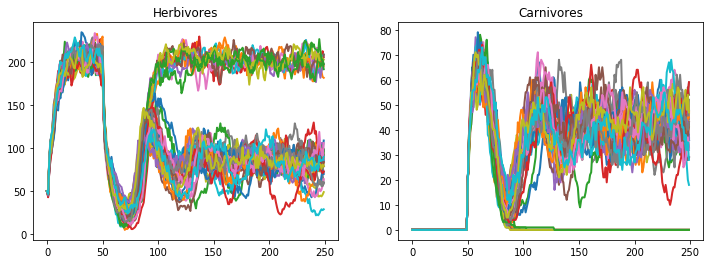

In [4]:
plt.subplot(1, 2, 1);
plt.plot(tc, hc, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc, cc, lw=2);
plt.title('Carnivores');

#### Late phase plots

With herbivores and carnivores in the simulation, there is not really a stationary state, but after 150 years the initial transients have died out. We look at the time after that.

In [5]:
stat_n0c = 150
tc_stat = tc[stat_n0c:]
hc_stat = hc[stat_n0c:, :]
cc_stat = cc[stat_n0c:, :]

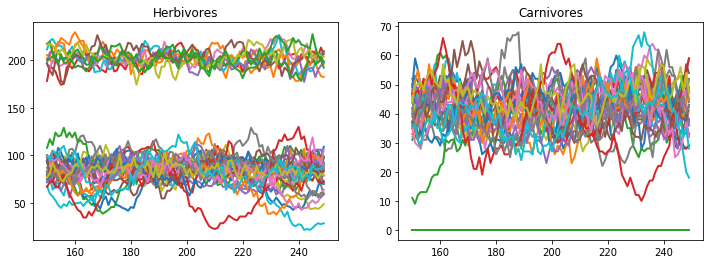

In [6]:
plt.subplot(1, 2, 1);
plt.plot(tc_stat, hc_stat, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc_stat, cc_stat, lw=2);
plt.title('Carnivores');

#### Mean animal numbers in late phase

In [7]:
scix = cc_stat[-1, :] > 5

##### Counts for cases with surviving carnivores

In [8]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat[:, scix].mean(), hc_stat[:, scix].std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat[:, scix].mean(), cc_stat[:, scix].std()))

mean(num herb) =  83.7 ± 14.9
mean(num carn) =  41.9 ±  7.9


##### Counts for cases with carnivores died out

In [9]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat[:, ~scix].mean(), hc_stat[:, ~scix].std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat[:, ~scix].mean(), cc_stat[:, ~scix].std()))

mean(num herb) = 201.7 ±  9.0
mean(num carn) =   0.0 ±  0.0


##### Proportion of cases with and without surviving carnivores

In [10]:
print("Trials with surviving carnivores: {:.1f}%".format(100*sum(scix)/len(scix)))
print("Trials with died-out carnivores : {:.1f}%".format(100*sum(~scix)/len(scix)))

Trials with surviving carnivores: 75.0%
Trials with died-out carnivores : 25.0%


### Repeat with different set of seeds and longer simulation time

In [11]:
mhcd = [np.loadtxt(fname, delimiter=',') for fname in glob.glob('data_ref/mono_hoh_9*.csv')]
tc = mhcd[0][:, 0]   # time axis

# herbivore and carnivore counts
hc = np.zeros((len(tc), len(mhcd)))  
cc = np.zeros((len(tc), len(mhcd)))  
for k, cts in enumerate(mhcd):
    hc[:, k] = cts[:, 1]
    cc[:, k] = cts[:, 2]

#### Plot animal counts

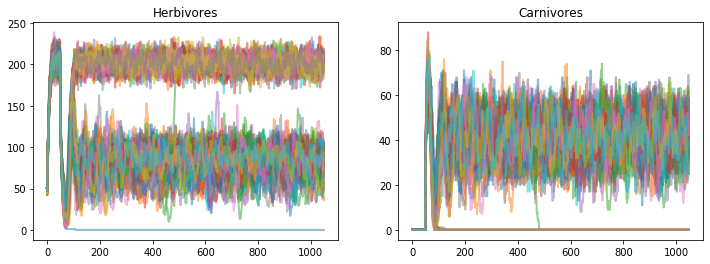

In [12]:
plt.subplot(1, 2, 1);
plt.plot(tc, hc, lw=2, alpha=0.5);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc, cc, lw=2, alpha=0.5);
plt.title('Carnivores');

The seems to be **one case** out of **onehundred** in which carnivores die out late, i.e., after more than 150 years.

#### Late phase plots

With herbivores and carnivores in the simulation, there is not really a stationary state, but after 150 years the initial transients have died out. We look at the time after that.

In [13]:
stat_n0c = 150
tc_stat = tc[stat_n0c:]
hc_stat = hc[stat_n0c:, :]
cc_stat = cc[stat_n0c:, :]

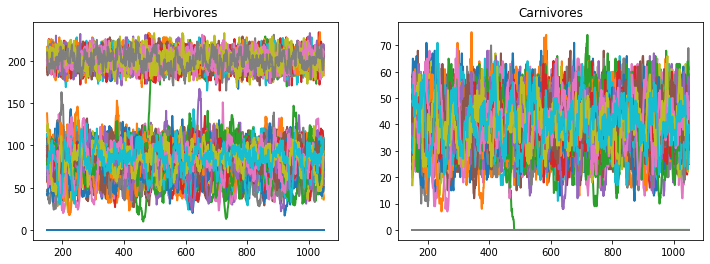

In [14]:
plt.subplot(1, 2, 1);
plt.plot(tc_stat, hc_stat, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc_stat, cc_stat, lw=2);
plt.title('Carnivores');

#### Mean animal numbers in late phase

In [15]:
scix = cc_stat[-1, :] > 5

##### Counts for cases with surviving carnivores

In [16]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat[:, scix].mean(), hc_stat[:, scix].std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat[:, scix].mean(), cc_stat[:, scix].std()))

mean(num herb) =  84.3 ± 15.1
mean(num carn) =  41.3 ±  8.2


##### Counts for cases with carnivores died out

In [17]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat[:, ~scix].mean(), hc_stat[:, ~scix].std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat[:, ~scix].mean(), cc_stat[:, ~scix].std()))

mean(num herb) = 192.8 ± 40.8
mean(num carn) =   0.5 ±  4.8


##### Proportion of cases with and without surviving carnivores

In [18]:
p_cs = sum(scix)/len(scix)
p_ce = 1 - p_cs
print("Trials with surviving carnivores: {:.1f}%".format(100*p_cs))
print("Trials with extinct carnivores  : {:.1f}%".format(100*p_ce))

Trials with surviving carnivores: 72.0%
Trials with extinct carnivores  : 28.0%


The probability of observing $n$ trials in a row with surviving carnivores is $p_{cs}^n$, or for the data we have seen so far

In [19]:
n = np.arange(1, 16)
p_n_cs = p_cs**n

Print a table showing $p_{cs}^n$ for each $n$ using a little bit of Python magic.

In [20]:
with np.printoptions(formatter={'float_kind': 
                                lambda x: '{:>4d} '.format(int(x)) if x >= 1
                                       else '{:>4.1f}%'.format(100*x)},
                     linewidth=100):
    print(np.vstack([n, p_n_cs]))

[[   1     2     3     4     5     6     7     8     9    10    11    12    13    14    15 ]
 [72.0% 51.8% 37.3% 26.9% 19.3% 13.9% 10.0%  7.2%  5.2%  3.7%  2.7%  1.9%  1.4%  1.0%  0.7%]]


We see that for $n=5$, as in the J06 notebook, there is a 19% chance of seeing carnivores survive in all of five trials, while for 15 trials this probability is below 1%. This means that it is not surprising that we saw all five trials with surviving carnivores in J06. It also means that we need to run at least 15 trials to be at least 99% certain that we will see a trial with extinct carnivores if the probability of carnivores dying out by year 1000 is 28% for a single trial.

### Distribution of number of trials with extinction

In the discussion above, we considered all 100 trials as one experiment and found $p_{ce}=28\%$ of trials ended in carnivore extinction. Based on this, we then found the probability $p_{cs}^n$ that any set of $n$ trials does not contain any extinction event.

We now go one step further and consider the distribution of the number of trials leading to extinction in a set of $n$ trials. Since trials are independent of each other, we can think of this as $n$ balls placed in a bowl, of which $p_{ce} n$ are red and the remainder white. The red balls represent trials leading to extinction. Performing a simulation experiment now means drawing a ball with replacement, and we ask how many red balls we will draw if we draw $n$ times.

We know now from combinatorics that the number of red balls will be distributed according to a binomial distribution with parameters $n$ and $p_{ce}$.

We can test this against our simulated data. For this purpose, we split our data into blocks of equal size and find for each block the number of trials leading to extinction. We could trials in which a single carnivore is left at the end of simulation time as extinction trials, since a single animal cannot procreate.

We compute also expected results and test observed against expected results using the $\chi^2$-test.

In [21]:
def bino_model(ccounts, p_ce, b_len):

    n_trials = ccounts.shape[1]
    n_blocks = int(n_trials / b_len)
    assert n_blocks * b_len == n_trials

    # number of trials ending in extinction for each block
    n_ce = np.array([sum(ccounts[-1, (b*b_len):((b+1)*b_len) ] <= 1)
                     for b in range(n_blocks)])
    
    # tabulate number of occurences and expected number from binomial dist.
    n_stats = np.zeros((b_len+1, 3))
    for k in range(b_len+1):
        n_stats[k, :] = k, sum(n_ce==k), n_blocks*stats.binom.pmf(k, n=b_len, p=p_ce)

    # print results: first row counts, second observed, third expected
    with np.printoptions(precision=1, suppress=True, linewidth=140):
        print(n_stats.T)
    print()
        
    # perform chi^2 test, ddof==1 because we obtained p_ce from the same dataset
    chi2res = stats.chisquare(f_obs=n_stats[:, 1], f_exp=n_stats[:, 2], ddof=1)
    chi2 = chi2res.statistic
    pval = chi2res.pvalue
    print('Chi^2 Result:\n  test stat: {:.4f}\n  p-value  : {:.4f}'.format(chi2, pval))
    

First try splitting into 50 blocks of 2 trials each

In [22]:
bino_model(cc_stat, p_ce, 2)

[[ 0.   1.   2. ]
 [26.  20.   4. ]
 [25.9 20.2  3.9]]

Chi^2 Result:
  test stat: 0.0031
  p-value  : 0.9552


- Here we can only have 0, 1 or 2 trials which end in carnivore extinction.
- Observed counts (middle row) agree very well with expected counts counts (bottom row).
- This is reflected in a very small test statistic and a high p-value.
- The observed and expected counts in the rightmost column are borderline wrt requirements of the $\chi^2$ test.

But we can conclude that the test confirms our hypothesis of a binomial distribution with extinction probability $p_{ce}=28\%$.

Now split into 25 blocks of 4 trials each

In [23]:
bino_model(cc_stat, p_ce, 4)

[[ 0.   1.   2.   3.   4. ]
 [ 7.  10.   7.   0.   1. ]
 [ 6.7 10.5  6.1  1.6  0.2]]

Chi^2 Result:
  test stat: 6.4071
  p-value  : 0.0934


- For the populated first three columns, results look quite good.
- The last two column have rather too small expected and observed counts.
- The p-value is still large enough that we do not reject the assumption of a binomial distribution.
- Strictly speaking, we should combine the little-populated categories to fulfill the test requirements on number of samples per category.

A final test splitting into 20 blocks of 5 trials each

In [24]:
bino_model(cc_stat, p_ce, 5)

[[0.  1.  2.  3.  4.  5. ]
 [6.  5.  5.  3.  1.  0. ]
 [3.9 7.5 5.9 2.3 0.4 0. ]]

Chi^2 Result:
  test stat: 3.1107
  p-value  : 0.5395


A similar situation as above, we do not reject the null hypothesis that the observations follow a binomial distribution with $p_{ce}=28\%$, but we again have some bins for which there are too few cases for the test to be fully valid.